# K-means
# The Algorithm
- First, identify how many clusters you want $k$
- Randomly choose $k$ centroids $C = \{c_1, c_2, \dots, c_k\}$ from the data points $X = \{x_1, x_2, \dots, x_n\} \in \mathbb{R}^D $.
- For each data point $x_i$, find the nearest centroid $c_j$ as its corresponding cluster using sum of squared distance $ D(x_i, c_j) = \displaystyle\sum_{i=1}^{n}{\| x_i - c_j \|^2}$.
- For each cluster, update its centroid by computing means value along the dimension of data points in the cluster.
- Compute the displacement between the old and the new centroids and repeat steps 2 and 3 if the displacement is less than a threshold (converged).

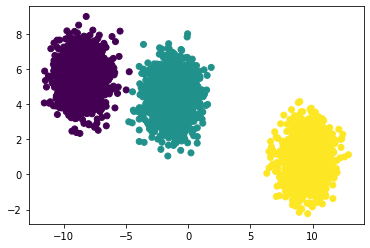

In [1]:
# Lets generate some artificial data to experiment with
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

# Generate data.
# `random_state` is the seed used by random number generator for reproducibility (default=None).
X, y = make_blobs(n_samples=5000, n_features=2, centers=3, random_state=7)

# Plot the data distribution (ground truth) using matplotlib `scatter(axis-x, axis-y, color)`.
plt.scatter(X[:,0], X[:,1], c=y)

Now that we understand our data .. lets fit a kmean model to it. A kmean model fitting means, we need to calculate the clusters centroids and which points belong to each cluster. We will start by choosing the $k$. Since we have created the data ourselves, we know there are 3 blobs. But if we don't know, we can also look at the plot to visually get a feel of how many clusters there is

In [2]:
# Perform K-means on our data (Fit for centroids)
""" K-means clustering algorithm.

Parameters
----------
n_init: int, optional, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
        
init: {'k-means++', 'random', or ndarray, or a callable}, optional
        Method for initialization, default to 'k-means++'.
        
        'k-means++': selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence.
        
        'random': generate k centroids from a Gaussian with mean and
        variance estimated from the data.

tol: float, default: 1e-4
        Relative tolerance with regards to inertia to declare convergence
        tolerance is computed using `np.mean(np.var(X, axis=0)) * tol)`

"""

from sklearn.cluster import KMeans 
kmeans_model = KMeans(n_clusters=3,  tol= 1e-4, random_state=170, verbose = True).fit(X)
print(kmeans_model.cluster_centers_)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9837.760228969451
start iteration
done sorting
end inner loop
Iteration 1, inertia 9837.760228969451
center shift 0.000000e+00 within tolerance 3.046576e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9851.349404070177
start iteration
done sorting
end inner loop
Iteration 1, inertia 9837.760228969451
center shift 1.323118e-02 within tolerance 3.046576e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9879.11533676427
start iteration
done sorting
end inner loop
Iteration 1, inertia 9837.760228969451
center shift 2.345021e-02 within tolerance 3.046576e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9839.246367169379
start iteration
done sorting
end inner loop
Iteration 1, inertia 9837.760228969451
center shift 8.845015e-03 within tolerance 3.046576e-03
Initialization co

Here are some other things you can do. 

In [3]:
y_pred = kmeans_model.predict(X)
# Btw, fitting and predicting can be made all in one step
kmeans_model.fit_predict(X)
kmeans_model.labels_
kmeans_model.score(X) # “inertia” (objective/cost function, sum squared distance)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9837.760228969451
start iteration
done sorting
end inner loop
Iteration 1, inertia 9837.760228969451
center shift 0.000000e+00 within tolerance 3.046576e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9851.349404070177
start iteration
done sorting
end inner loop
Iteration 1, inertia 9837.760228969451
center shift 1.323118e-02 within tolerance 3.046576e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9879.11533676427
start iteration
done sorting
end inner loop
Iteration 1, inertia 9837.760228969451
center shift 2.345021e-02 within tolerance 3.046576e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9839.246367169379
start iteration
done sorting
end inner loop
Iteration 1, inertia 9837.760228969451
center shift 8.845015e-03 within tolerance 3.046576e-03
Initialization co

-9837.76022896944

# Measuring Cluster Quality to Determine the Number of Clusters
### Unsupervised
- 1- Elbow Method
- 2- Silhouette Analysis

s [0.76976232 0.66222429 0.69723105 ... 0.77282582 0.62733114 0.46093979] s_mean 0.7423436600516422
s [0.75839038 0.77526616 0.6801004  ... 0.79937009 0.81477066 0.78316477] s_mean 0.7880526216237652
s [0.75839038 0.77526616 0.6801004  ... 0.79937009 0.81477066 0.78316477] s_mean 0.6117165035557788
s [0.72976511 0.09730205 0.4203785  ... 0.77768712 0.29898881 0.48986493] s_mean 0.4513674029027843
s [-0.01503715  0.18509874  0.2626154  ...  0.1425152   0.37335192
  0.39266285] s_mean 0.30966220112123094


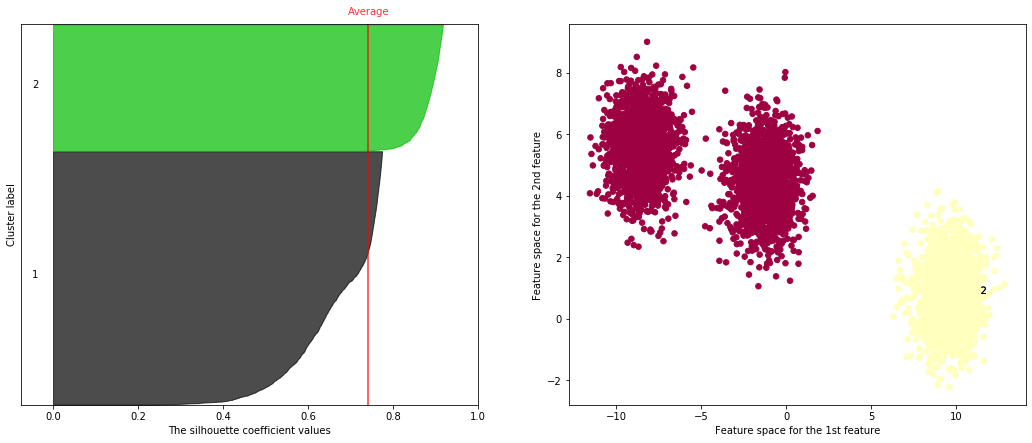

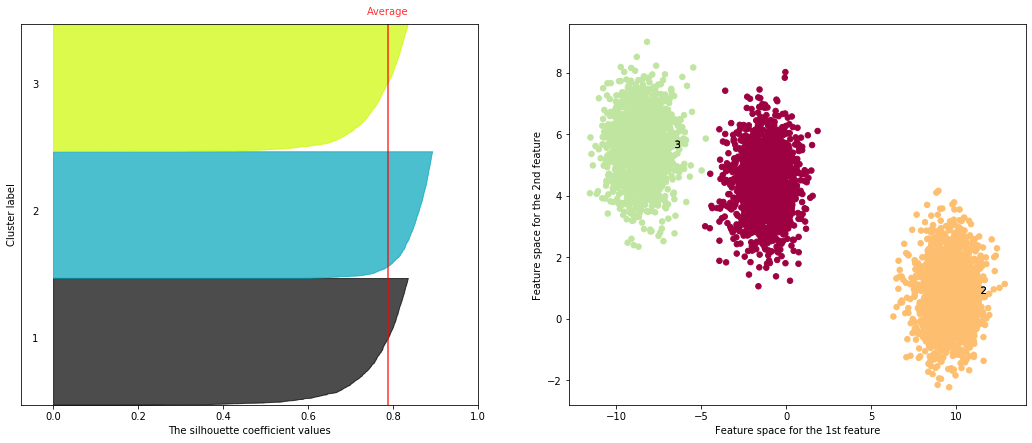

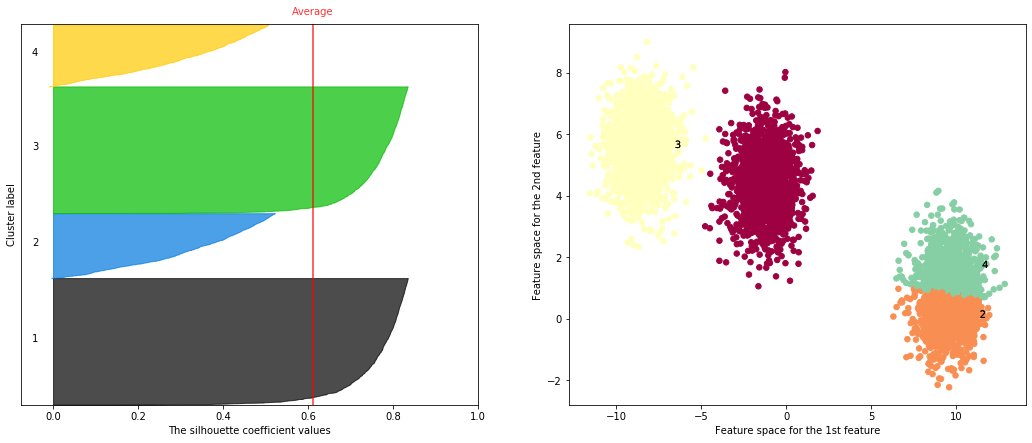

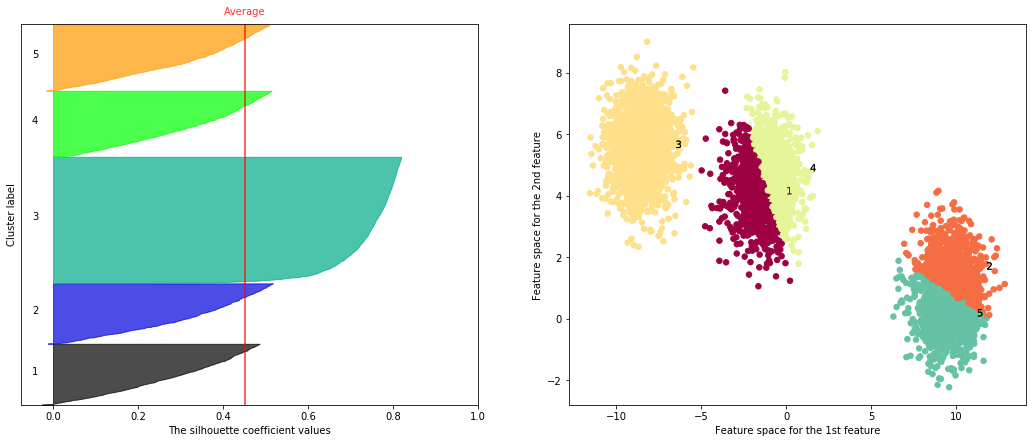

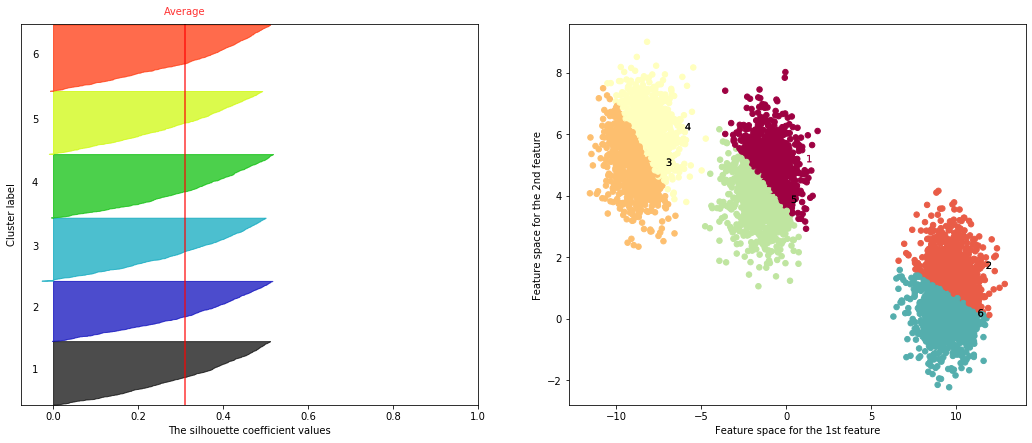

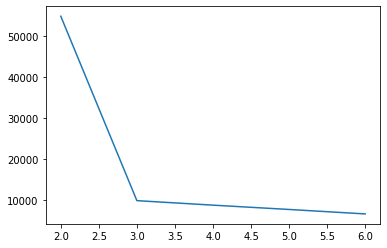

In [4]:
from kmean_plots import kmeans_plot, silhouette_plot
from sklearn import metrics # for evaluations
# List of number of clusters
range_n_clusters = [2, 3, 4, 5, 6]
score_kmeans = []

# For each number of clusters, perform Silhouette analysis and visualize the results.
for n_clusters in range_n_clusters:
    
    
    # Perform k-means.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    y_pred = kmeans.fit_predict(X)
    score_kmeans.append(-kmeans.score(X))
    
    # Compute the Silhouette Coefficient for each sample.
    s = metrics.silhouette_samples(X, y_pred)
    
    # Compute the mean Silhouette Coefficient of all data points.
    s_mean = metrics.silhouette_score(X, y_pred)
    
    print('s', s, 's_mean', s_mean)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))
    ax1 = silhouette_plot(X, y_pred, n_clusters=n_clusters, ax=ax1)
    ax2 = kmeans_plot(X, y_pred, kmeans.cluster_centers_, ax=ax2)
    
plt.figure()
plt.plot(range_n_clusters, score_kmeans)

What we are looking for is a siluhoette graph that has clusters silhoutte barely above the average and has a homogeneous shape per cluster

# Kmeans Limitations
Kmeans does not handle clusters very well and it can not deal with spiral/circular type data

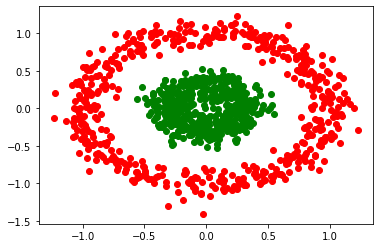

In [5]:
from sklearn.datasets import make_circles 
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ro')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'go')

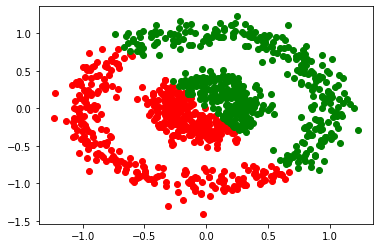

In [6]:
# Run k-means on non-spherical data.
y_pred = KMeans(n_clusters=2, random_state=170).fit_predict(X)

# Plot the predictions.
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')


# DBSCAN: Density-Based Spatial Clustering of Applications with Noise
### Parameters
- $Eps$: Maximum radius of the neighborhood.
- $MinPts$: Minimum number of points in the Eps-neighborhood of a point.
### Terms
- The Eps-neighborhood of a point $q$－$N_{Eps}$: A point $p \in N_{Eps}(q)$ if $D(p,q) \leq Eps$. (Point inside the circle).
- Outlier: Not in a cluster.
- Core point: $\left\vert N_{Eps}(q) \right\vert \geq MinPts$ (dense neighborhood).
- Border point: In cluster but neighborhood is not dense.

### The Algorithm
- Randomly choose a point $p$.
- Retrieve all points density-reachable from $p$ w.r.t. $Eps$ and $MinPts$.
- If $p$ is a core point, a cluster is formed.
- If $p$ is a border point, no points are density-reachable from $p$, then visit the next point.
- Repeat the process until all the data points have been processed.


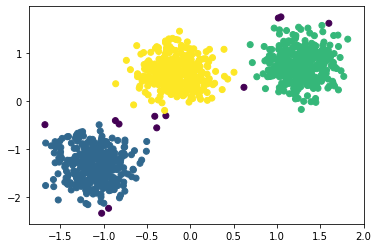

In [12]:
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import DBSCAN

# Generate data with 3 centers.
X, y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=170)

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

# Perform DBSCAN on the data
y_pred = DBSCAN(eps=0.3, min_samples=30).fit_predict(X) # change eps from 0.3 to 0.2

# Plot the predictions
plt.scatter(X[:,0], X[:,1], c=y_pred)

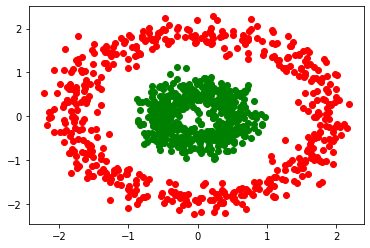

In [13]:
# Generate non-spherical data.
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

# Perform DBSCAN on the data
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

# Plot the data distribution. (Here's another way to plot scatter graph)
plt.plot(X[y_pred == 0, 0], X[y_pred == 0, 1], 'ro')
plt.plot(X[y_pred == 1, 0], X[y_pred == 1, 1], 'go')


# Supervised Cluster Evaluation
There are 2 metrics homogenity and completeness
- # Completeness 
`metrics.completeness_score(labels_true, labels_pred)` is a Completeness metric of a cluster labeling given a ground truth.
A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

In other words, how much elements of the same class belong to the same cluster

- # Homogenity 
`metrics.homogeneity_score(labels_true, labels_pred)` A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

In other words, how much elements of the same cluster belong to the same class

**Note if you interchange the labels in each function, it will return the other. i.e., if you interchange the labels_true and labels_pred in the completeness, it will give you homogenity score and vice versa ** 

In [1]:
metrics.homogeneity_score(labels_true=y, labels_pred=y_pred)

NameError: name 'metrics' is not defined

In [ ]:
metrics.completeness_score(labels_true=y, labels_pred=y_pred)

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples = 5000,n_features=2,centers = 3,random_state = 7)

In [3]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
y_pred = DBSCAN(eps = 0.1,min_samples = 30).fit_predict(x_scaled)

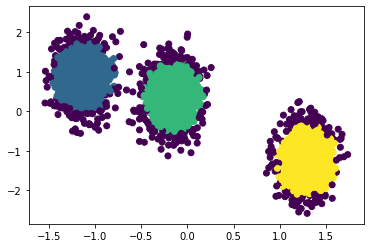

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_scaled[:,0],x_scaled[:,1],c= y_pred)